# Necessary library install (uncomment below lines to install)

In [4]:
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install seaborn

## Importing necessary libraries

In [146]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

# Dataset Description

### Used Cars Price Prediction

Dataset link:https://www.kaggle.com/avikasliwal/used-cars-price-prediction

## Columns description

Name - The brand and model of the car.

Location - The location in which the car is being sold or is available for purchase.

Year - The year or edition of the model.

Kilometers_Driven - The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type - The type of fuel used by the car. (Petrol / Diesel / Electric / CNG / LPG)

Transmission - The type of transmission used by the car. (Automatic / Manual)

Owner_Type - Whether the ownership is Firsthand, Second hand or other.

Mileage - The standard mileage offered by the car company in kmpl or km/kg

Engine - The displacement volume of the engine in cc.

Power - The maximum power of the engine in bhp.

Seats - The number of seats in the car.

New_Price - The price of a new car of the same model.

Price - The price of the used car in INR Lakhs.


# Acquisition

In [102]:
## loading dataset to a variable
train_data = pd.read_csv("dataset/train-data.csv")
test_data = pd.read_csv("dataset/test-data.csv")
## showing top 6 row of the dataset
train_data.head()
## showing last 6 row of the dataset
# vehicles_data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Target:

We have to predict the used car price 

### Target column: Price

# Exploration and understanding

In [103]:
# number of rows # number of columns
# rows, columns
print(train_data.shape)
print(test_data.shape)

(6019, 14)
(1234, 13)


In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.4+ KB


In [105]:
# Column names
column_names = train_data.columns.values
column_names

array(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine',
       'Power', 'Seats', 'New_Price', 'Price'], dtype=object)

In [116]:
# Insight: 'Unnamed: 0' column is actually the index so we can ingore that.
# Location column can be saved into a variable so that it can used later.
train_location = train_data.loc[:, train_data.columns=='Location']
train_data.drop(['Unnamed: 0', 'Location'], axis=1, inplace=True)

KeyError: "['Unnamed: 0' 'Location'] not found in axis"

In [107]:
## checking unique cars in the dataset
# len(set(train_data['Name'])) # python way
unique_cars = train_data['Name'].nunique()
unique_years = train_data['Year'].nunique()
max_year = train_data['Year'].max()
min_year = train_data['Year'].min()
# unique_location = train_data['Location'].nunique()
# other way
# unique_years = len(pd.unique(vehicles_data.year)) # pandas another way

In [108]:
print("Unique cars:", unique_cars)
print("Unique year:", unique_years)
print("Max year model:", max_year)
print("Min year model:", min_year)
# print("Unique location:", unique_location)

Unique cars: 1876
Unique year: 22
Max year model: 2019
Min year model: 1998


In [109]:
# Fuel type would be a important fetaure
# Q what types of fuel are used as the automobiles' primary fuel types
unique_fuel_type = train_data['Fuel_Type'].nunique()
print(unique_fuel_type)

## Their are 5 unique fueltypes
train_data['Fuel_Type'].value_counts()

# Insight : looks like most most cars in the dataset use Diesel, 
# and the second most common fuel type is Petrol

5


Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [93]:
# Insight: Their are some columns in the data set meant to be numeric but inputed as Categorial so we have to handle that.
# Mileage 26.6 km/kg
# Engine 998 CC
# Power 58.16 bhp

In [110]:
# TODO: Have to separate these column to get Insight
train_data['Mileage'], train_data['Mileage_Unit'] = train_data['Mileage'].str.split(' ', 1).str
train_data['Engine'], train_data['Engine_Unit'] = train_data['Engine'].str.split(' ', 1).str
train_data['Power'], train_data['Power_Unit'] = train_data['Power'].str.split(' ', 1).str

In [99]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
Name                 6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
Mileage_Unit         6017 non-null object
Engine_Unit          5983 non-null object
Power_Unit           5983 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 705.4+ KB


In [111]:
## Converting Object dtypes to integer
train_data['Mileage'] = pd.to_numeric(train_data['Mileage'])
train_data['Engine'] = pd.to_numeric(train_data['Engine'])
# train_data['Power'] = pd.to_numeric(train_data['Power'])

In [112]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
Name                 6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null float64
Engine               5983 non-null float64
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
Mileage_Unit         6017 non-null object
Engine_Unit          5983 non-null object
Power_Unit           5983 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 705.4+ KB


In [113]:
## Separating boolean, numerical and categorical columns.
def separate_data_types_in_df(dataFrame:pd.DataFrame, variable_type:list):
    """
    This function will return boolean or Numeric or Categorical variable from a dataFrame and their length
    
    Arguments: [dataFrame] : A pandas data frame
               [variable_type] : A list of variable types
    example:
        ['float64','float32','int32','int64'] represents Numeric Variable
        ['bool'] represents boolean Varible
        ['object'] represents Categorical Varible
    """
    column_types = [key for key in dict(dataFrame.dtypes)
             if dict(dataFrame.dtypes)[key] in variable_type ]
    
    return column_types, len(column_types)

In [142]:
numeric_columns, numeric_columns_length = separate_data_types_in_df(train_data, ['float64','int64'])
categorical_columns, categorical_columns_length = separate_data_types_in_df(train_data, ['object'])

In [143]:
print("Numerical columns:")
print(numeric_columns)
print("Categorical columns:")
print(categorical_columns)

Numerical columns:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Seats', 'Price']
Categorical columns:
['Name', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage_Unit', 'Engine_Unit', 'Power_Unit']


In [120]:
print(numeric_columns_length)
print(categorical_columns_length)

6
9


In [121]:
## Counting missing values in the dataset.
missing_values_freq = train_data.isnull().sum()

In [122]:
missing_values_freq
# Insight : looks like lots of missing values some values are pretty bad like 
# Engine                 36
# Power                  36
# Seats                  42
# New_Price            5195
# TODO: We have to handle missing value

Name                    0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
Mileage_Unit            2
Engine_Unit            36
Power_Unit             36
dtype: int64

In [123]:
train_new_price = train_data.loc[:, train_data.columns=='New_Price']
train_data.drop(['New_Price'], axis=1, inplace=True)

# Insight: Most of the New_Price data are missing and so right now we
# are droping that from train data. If need we can use the train_new_price variable

In [125]:
train_data[numeric_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


In [ ]:
#Insight: Kilometers_Driven, Engine has some outliers as they are deviated too much from the mean.

In [127]:
train_power = train_data.loc[:, train_data.columns=='Power']
train_data.drop(['Power'], axis=1, inplace=True)

In [128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null float64
Engine               5983 non-null float64
Seats                5977 non-null float64
Price                6019 non-null float64
Mileage_Unit         6017 non-null object
Engine_Unit          5983 non-null object
Power_Unit           5983 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 611.4+ KB


In [139]:
for col in numeric_columns:
    train_data[col] = train_data[col].fillna(train_data[col].median())

In [144]:
for col in categorical_columns:
    train_data[col] = train_data[col].fillna(train_data[col].value_counts().idxmax())

<Figure size 432x288 with 0 Axes>

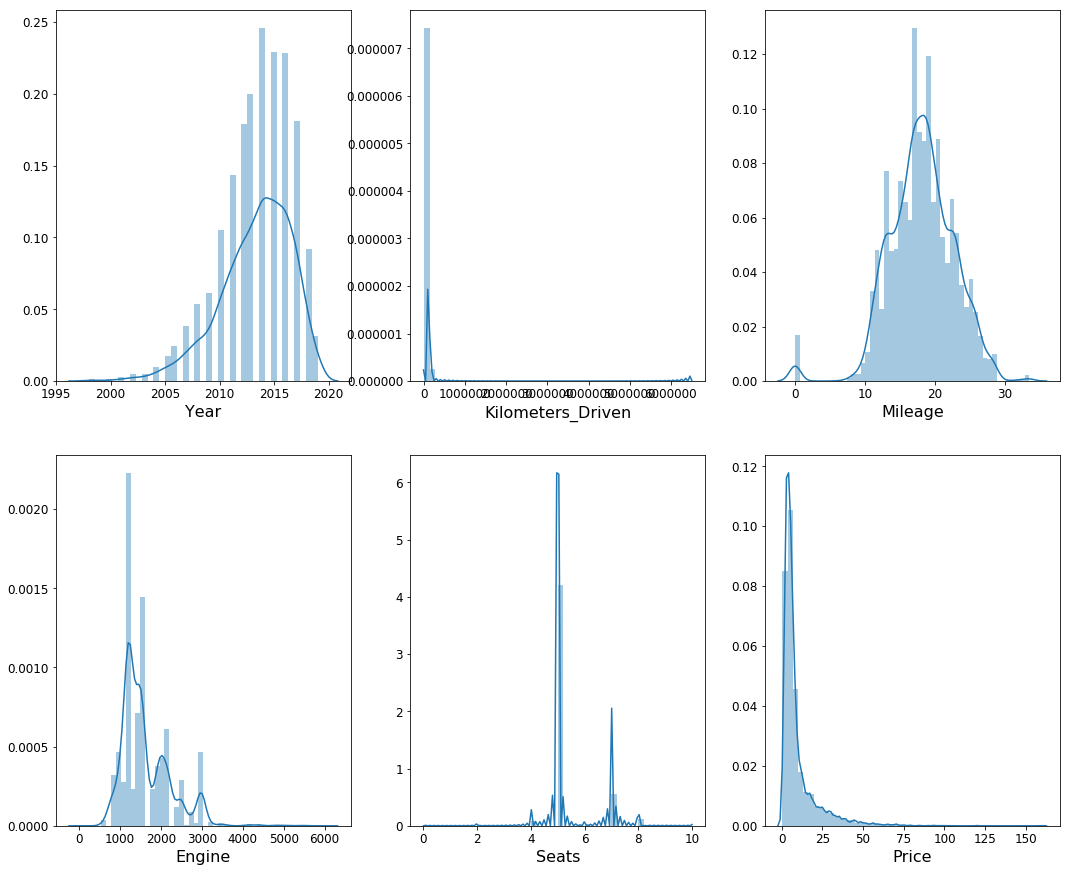

In [140]:
def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(train_data, numeric_columns)

<Figure size 432x288 with 0 Axes>

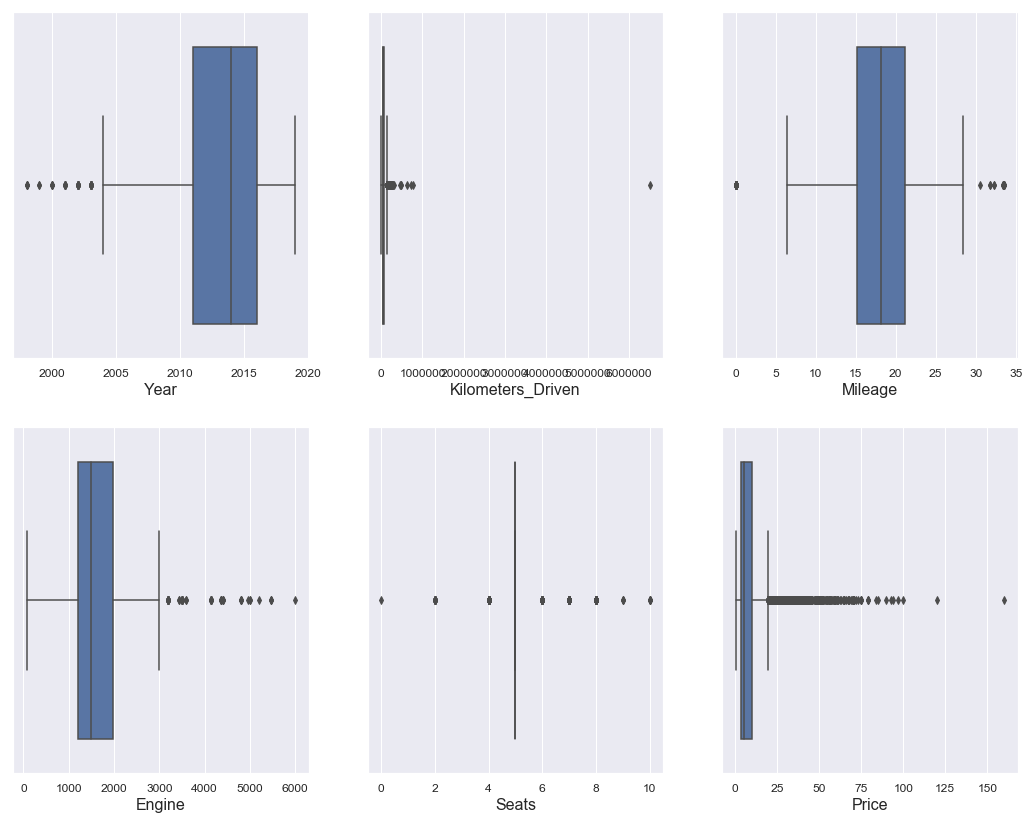

In [147]:
def plot_boxplot(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,14))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.boxplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_boxplot(train_data, numeric_columns)

# Munging, wrangling, and manipulation

### Types of transmissions used by these automobiles

#### Our main concern Car's transmission is automatic or manual

In [148]:
train_data["Transmission"].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [5]:
# Insight: There are roughly twice as many cars models with Manual transmission as there are models with Automatic transmission

In [149]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

In [150]:
for col in numeric_columns:
    print(col,'-->',detect_outlier(train_data[col]))

Year --> [274, 315, 364, 613, 631, 911, 1221, 1224, 1318, 1845, 1903, 1907, 1999, 2487, 2524, 2554, 2656, 2737, 3138, 3189, 3221, 3228, 3749, 3806, 3854, 3942, 3963, 4143, 4152, 4351, 4629, 4658, 4709, 4712, 4730, 4791, 4822, 4863, 5040, 5137, 5270, 5432, 5453, 5643, 5647, 5657, 5716, 5914, 5926, 5943]
Kilometers_Driven --> [29, 64, 77, 154, 164, 165, 181, 230, 251, 261, 315, 319, 323, 340, 345, 358, 432, 469, 482, 506, 556, 576, 624, 647, 664, 685, 792, 800, 838, 920, 946, 981, 994, 1013, 1022, 1068, 1101, 1176, 1232, 1248, 1297, 1409, 1442, 1447, 1470, 1473, 1521, 1528, 1539, 1555, 1584, 1597, 1656, 1686, 1701, 1716, 1717, 1721, 1722, 1756, 1766, 1834, 1845, 1846, 1860, 1972, 1975, 1986, 2033, 2037, 2093, 2126, 2182, 2238, 2266, 2267, 2274, 2277, 2328, 2336, 2346, 2359, 2368, 2393, 2465, 2469, 2507, 2538, 2568, 2588, 2620, 2644, 2697, 2737, 2779, 2819, 2823, 2893, 2908, 2910, 2919, 2922, 2988, 3034, 3053, 3092, 3112, 3113, 3173, 3187, 3212, 3250, 3252, 3264, 3293, 3315, 3408, 3429, 3

In [152]:
for col in numeric_columns:
    indx = detect_outlier(train_data[col])
    train_data[col].loc[indx] = train_data[col].median()

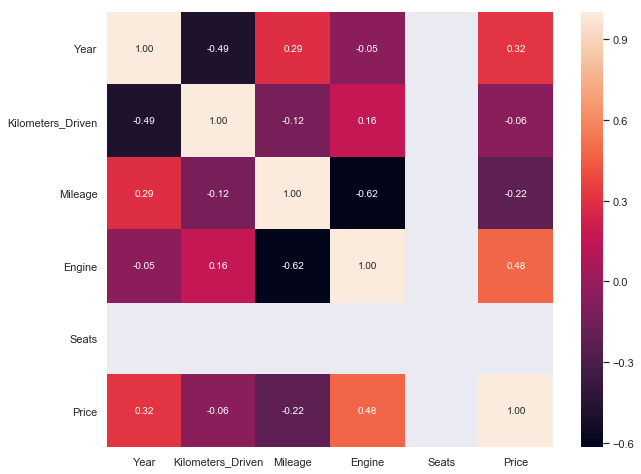

In [153]:
corr = train_data[numeric_columns].corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f");

# Analysis and modeling

In [155]:
x = train_data.loc[:, train_data.columns!='Price']
y = train_data.loc[:, train_data.columns=='Price']

In [156]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1234)

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [158]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_lr = {
    'C': np.logspace(-5, 8, 15),
    'penalty': ['l1', 'l2']
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2,20,5)
}

In [159]:
def randomsearch(X, y, estimator, param_grid, cv=5, n_iter=10, n_jobs=2, random_state=1234):
    random = RandomizedSearchCV(estimator=estimator, 
                                param_distributions=param_grid, 
                                cv=cv, 
                                n_iter=n_iter, 
                                n_jobs=n_jobs,
                                random_state=random_state)
    random.fit(X, y)
    return random.best_params_

In [160]:
# randomsearch(x_train, y_train, LogisticRegression(), param_grid_lr)

ValueError: could not convert string to float: 'bhp'

In [162]:
randomsearch(x_train, y_train, DecisionTreeClassifier(), param_grid_dt)

ValueError: could not convert string to float: 'Mercedes-Benz C-Class Progressive C 220d'

In [163]:
lr_model = LogisticRegression(penalty='l2', C=3.727593720314938).fit(x_train, y_train)
m1_ypred = lr_model.predict(x_test)

model2 = DecisionTreeClassifier(min_samples_split= 12, criterion='entropy').fit(x_train, y_train)
m2_ypred = model2.predict(x_test)

ValueError: could not convert string to float: 'bhp'

# Communication and operationalization